In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_df = pd.read_csv("./Data/train_clean.csv")
valid_df = pd.read_csv("./Data/valid_clean.csv")
test_df  = pd.read_csv("./Data/test_clean.csv")

In [13]:
X_train = train_df.drop(columns=["ID", "Label"])
y_train = train_df["Label"]

X_valid = valid_df.drop(columns=["ID", "Label"])
y_valid = valid_df["Label"]

X_test  = test_df.drop(columns=["ID", "Label"])
y_test  = test_df["Label"]

In [14]:
text_col = "Statement"
cat_cols = ["Party Affiliation", "Speaker Job Title", "State Info"]
num_cols = ["char_count", "word_count", "avg_word_length", "true_ratio", "false_ratio"]

In [15]:
text_transformer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

cat_transformer = OneHotEncoder(handle_unknown="ignore")

num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_col),
        ("cat", cat_transformer, cat_cols),
        ("num", num_transformer, num_cols)
    ]
)

In [ ]:
model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
        max_iter=500, 
        class_weight="balanced", 
        C=0.1,          
        penalty="l2",     
        solver="lbfgs"
    ))
])

Validation Results:
              precision    recall  f1-score   support

 barely-true       0.29      0.20      0.23       237
       false       0.35      0.29      0.32       263
   half-true       0.43      0.40      0.41       248
 mostly-true       0.48      0.52      0.50       251
  pants-fire       0.32      0.55      0.40       116
        true       0.21      0.26      0.23       169

    accuracy                           0.36      1284
   macro avg       0.35      0.37      0.35      1284
weighted avg       0.36      0.36      0.35      1284

Validation Accuracy: 0.3574766355140187


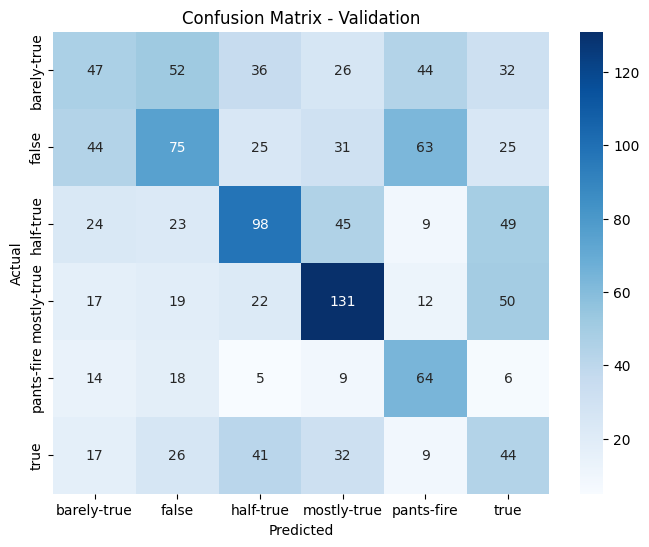

In [17]:
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("Validation Results:")
print(classification_report(y_valid, y_pred))
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation")
plt.show()

In [18]:
y_train_pred = model.predict(X_train)

print("Training Results:")
print(classification_report(y_train, y_train_pred))

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Results:
              precision    recall  f1-score   support

 barely-true       0.43      0.34      0.38      1654
       false       0.50      0.33      0.40      1995
   half-true       0.52      0.48      0.50      2114
 mostly-true       0.52      0.60      0.55      1962
  pants-fire       0.31      0.67      0.42       839
        true       0.37      0.35      0.36      1676

    accuracy                           0.44     10240
   macro avg       0.44      0.46      0.43     10240
weighted avg       0.46      0.44      0.44     10240

Training Accuracy: 0.44384765625
